In [1]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [2]:
df = read_csv("../output/น่าน พิษณุโลก 2558-2563.csv")
print(f"Size of data: {len(df)}")

Size of data: 79345


In [3]:
X = df[["pH", "EC", "Temp"]]
y = df["DO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

print(tuple(map(len, [X_train, X_test, y_train, y_test])))

(71410, 7935, 71410, 7935)


In [4]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [5]:
sorted_indices = y_test.argsort()
X_test = X_test.iloc[sorted_indices]
y_test = y_test.iloc[sorted_indices]

y_pred = reg.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 1.643871072219361
Root Mean Squared Error: 1.2821353564344762
R2 Score: 0.05600718090499879


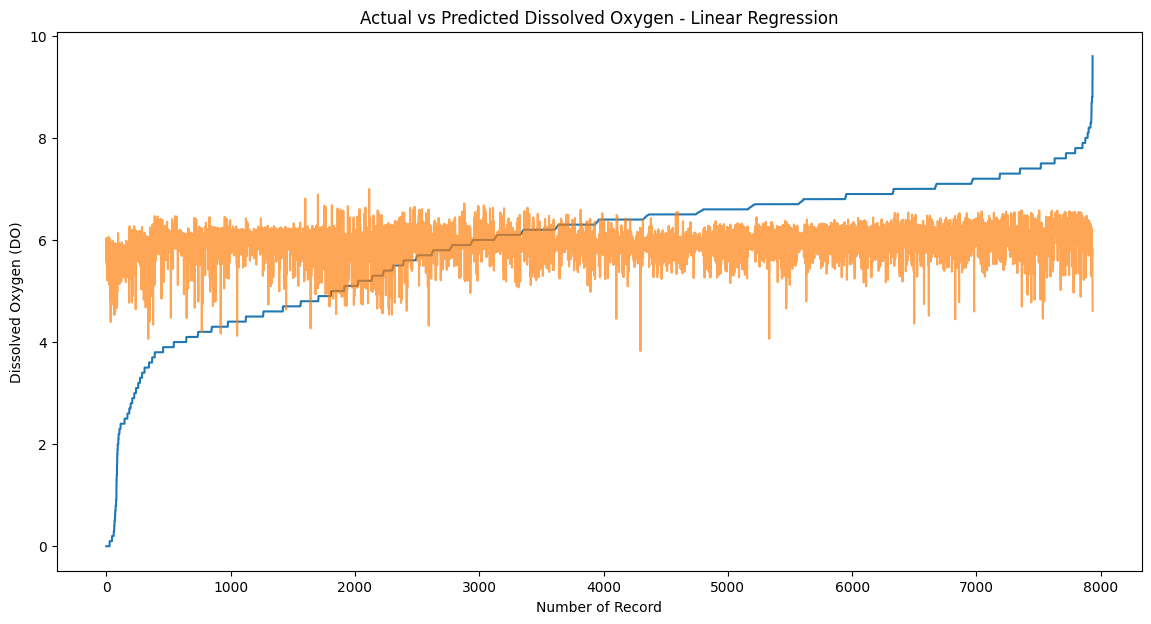

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label="Actual DO")
plt.plot(range(len(y_test)), y_pred, label="Predicted DO", alpha=0.7)
plt.xlabel("Number of Record")
plt.ylabel("Dissolved Oxygen (DO)")
plt.title("Actual vs Predicted Dissolved Oxygen - Linear Regression")
# plt.legend()
plt.show()